# Réalisation d'un algorithme de Reinforcement Learning (RL)

## Table des matières :

## Introduction 

## I : Problèmes étudiés
### a : Chaines de Markov et récompenses
### b : Politique 
### c : Implémentation et tests


## II : Programmation dynamique : une première approche
### a : Equation de Bellman, fonction valeur 
### b : Algorithme de détermination de la fonction valeur
### c : Application au plus court chemin

## III : Deux algorithmes d'apprentissage : le TD-Lambda et le Q-Learning
### a : Le TD-Lambda
### b : Le Q-Learning

## IV : Une application : Le jeu Pacman
### a : Présentation du jeu
### b : Test avec $\epsilon$-greedy
### c : Test avec Softmax (Boltzmann)

## Conclusion

### a : Conclusion générale
### b : Apports personnels
#### i : Apports personnels Alexis Ayme
#### ii : Apports personnels Philippe Cantrelle
#### iii : Apports personnels Hélène Wang

# Introduction

Le Machine Learning, s’appuie sur des raisonnements mathématiques, traduits informatiquement dans des algorithmes capables de digérer de grandes quantités d’informations pour acquérir de nouvelles connaissances ou encore comprendre un comportement. Egalement appelé apprentissage automatisé, le principe du Machine Learning consiste à pouvoir apprendre en toute autonomie à partir de données et d’évoluer en permanence. Ces fonctions d’apprentissage automatique détectent des schémas clé et y ajustent leur fonctionnement. Concrètement, à chaque interaction avec l’application, un clic ou  un « like » par exemple, l’application est capable d’en déduire un comportement et d’ajuster en fonction le contenu proposé et son interface. Cette mécanique suscite aujourd’hui beaucoup d’engouement chez le grand public. Le ML en tant que tel est très complexe à mettre en place. 
    
Quatre grands types d'apprentissage existent au sein du Machine Learning, à savoir :
    -L'apprentissage supervisé
    -L'apprentissage semi-supervisé
    -L'apprentissage non supervisé
    -L'apprentissage par renforcement
    
Nous avons décidé d'être, pour un premier projet de programmation, ambitieux et avons pris le risque de nous attaquer à un sujet de Machine Learning. Nous nous sommes en effet consacré à l'apprentissage par renforcement, également appelé Reinforcement Learning en anglais (RL). L’apprentissage par renforcement correspond au cas où l'algorithme apprend un comportement étant donnée une observation. L'action de l'algorithme sur l'environnement produit une valeur de retour qui guide l'algorithme d'apprentissage. 
    
Lorsqu’il y a un problème, la machine est censée décider de la meilleure action à effectuer en fonction de son état actuel.  Lorsque cette étape est répétée, le problème est connu comme étant un processus de décision de Markov. De façon optimale, l’apprentissage par renforcement utilise des processus de décision de Markov, mais l'idée de base est tout simplement de saisir les aspects les plus importants du vrai problème face à une machine en interaction avec son environnement, pour atteindre un objectif. De toute évidence, un tel agent doit être capable de détecter l'état de l'environnement dans une certaine mesure et doit être capable de prendre des mesures qui affectent l'état. 
    
Nous nous sommes appuyé sur le cours de Rémi Munos, lui-même disponible sur le site de Xavier Dupré, pour réaliser notre projet. Nous avons tout d'abord compris les notions de bases du Reinforcement Learning et nous nous sommes intéressés à différents problèmes. Nous avons ensuite effectuer une première approche, en utilisant la programmation dynamique. Enfin, nous nous sommes intéressés à un algorithme d'apprentissage : le TD-lambda.

**ATTENTION : Ce notebook n'a pas vocation à être tout notre code mais uniquement à le présenter l'expliquer. Tous nos codes sont disponibles dans le même dossier. Par exemple, dans les classes, le constructeur (def __init__) est souvent omis dans le notebook mais pas dans le véritable code**

# I : Problèmes étudiés

## a : Chaines de Markov et récompenses

Tout d’abord, définissons le type de problème que nous allons chercher à résoudre. 


Nous étudierons des situations dans lesquelles l’ordinateur évoluera au sein d’un environnement. Dans cet environnement, on supposera que l’ordinateur se trouve dans un état initial. Il a alors la possibilité d’effectuer plusieurs actions. Après avoir choisi l’une d’entre elles, il se retrouvera dans un nouvel état (qui peut éventuellement être le même que le précédent) avec une certaine probabilité, et récoltera la récompense correspondante. Ainsi, l’ordinateur accumule les récompenses au fil de son parcours, jusqu’à atteindre un état terminal au-delà duquel plus aucune action n’est possible.
Pour plus de commodité, introduisons quelques notations :


$X$ l’ensemble des états.


$A(s)$ l’ensemble des actions possibles à partir de l’état s et $A^{*}$ l’ensemble regroupant toutes les actions possibles.


En notant $x_1,…,x_n$ et $a_1,…,a_n$ les variables aléatoires correspondant respectivement aux $n$ premiers états et les $n$ premières actions, on supposera vérifiée la propriété des chaînes de Markov :


$$∀i∈\{1,…,n-1\},   P(x_{i+1}│x_{1},…,x_{i},a_{1},…,a_{i})=P(x_{i+1}│x_{i},a_{i} )$$


Autrement dit, la variable $x_{i+1}$ ne dépend que de $x_{i}$ et de $a_{i}$, les états et les actions de l’étape précédente. Ainsi, on peut définir la probabilité de transition de $y$ à $x$ sous l’action $a$ comme étant :


$$T(y,a,x)=P(x_{i+1}=x|x_{i}=y,a_{i}=a)$$


Dans la suite et dans les algorithmes, on considèrera la matrice T de transition qui vérifie :
$$T:X×A×X→[0,1]$$  et  $$T[x_i,a,x_{i+1} ]=T(x_{i},a,x_{i+1} )$$


On notera également $r(x,a)$ la variable aléatoire correspondant à la récompense que l’on obtient en effectuant dans l’état $x$ l’action $a$. Dans la suite et dans les algorithmes, les récompenses seront données sous la forme d’une matrice R et seront déterminés.

## b : Politique 

On appelle politique (déterministe) $\Pi $ une application de $S$ vers $A^*$.
De façon succinte, il s'agit du choix d'action que va faire notre individu lorsqu'il se trouve dans un état donné.

Exemple : notre individu, qui suit la politique $\Pi$, est dans l'état $s$. Il va donc effectuer l'action $\Pi(s)$.

Il nous arrivera de prendre des politiques probabilistes, c'est-à-dire que $\Pi(s)$ est une variable aléatoire (voir dernière partie les politiques $\epsilon$-gloutonne ou softmax).

## c : Implémentation et tests

Nous avons commencé par coder notre environnement. Pour cela, nous avons créé une classe Environnement pour laquelle la matrice de transition $\mathtt{T}$ et celle des récompenses $\mathtt{R}$ sont des données. On code la fonction $A$ comme un vecteur  d'ensemble  $\mathtt{A}$ par exemple  $\mathtt{A[i]= \{1,2,3\}}$.

Nous avons aussi doté cette classe de plusieurs méthodes permettant entre autre de décrire les trajectoires et calculer les récompenses pour un individu qui choisirait ses actions au hasard ou bien qui suivrait une politique fournie en donnée.


Voici une partie du code de la classe **Environnement** (le reste est dans le fichier *Environnement.py*) : 

In [1]:
import numpy as np

class Environnement :
    """Les états sont représentés par des entier de 0 à n-1 et les actions de 1 à m, l'action 0
    représente l'action vide """

    def  __init__ (self,T,R,A,m,gamma): 
       """T la matrice de transition, R le vecteur des récompenses et A les ensembles d'action """
       self.m_T = np.copy (T)
       self.m_A = np.copy (A)
       self.m_R = np.copy (R)
       self.m_m=m
       self.m_dim= len (R)
       self.m_gamma = gamma
    

    def dimension(self): 
        return self.m_dim


    def actions_possibles (self,s):
        """donne la liste des actions possibles à partir de l'état s"""
        return self.m_A[s]

    
    def est_terminal(self,s):
        """indique si l'état s est terminal"""
        return self.m_A[s]=={} or self.m_A[s]==set()

    
    def etat_suivant (self,s,a):
        """Retourne l'état suivant s après l'action a (suit la probabiblité donnée par T)"""
        u=np.random.random()
        som=0
        for i in range(self.m_dim):
            som+= self.m_T[s,a,i]
            if u<=som :
                return i

            
    def récompense(self,s,a):
        """Retourne la récompense suivant s après l'action a (suit la probabilité donnée par T)"""
        return self.m_R[s,a]

    
    def trajectoire_aléatoire (self,si,k):
        """donne une trajectoire (et les récompenses) aléatoire de taille k, partant 
        de si, et construite en choisissant à chaque fois les actions de manière aléatoire """
        if k== 0 or self.est_terminal(si) :
            return [(si,0)]
        else :
            a= np.random.choice(np.array(list(self.m_A[si]))) #choix d'une action au hasard parmi toutes celles qui 
            #sont possibles en si
            sp = self.etat_suivant(si,a)
            r = self.récompense(si,a)
            return [(si,r)]+ self.trajectoire_aléatoire(sp,k-1)

    def trajectoire_pi (self,si,k,pi):
        """donne une trajectoire (et les récompenses) de taille k partant de si construite 
        en respectant la politique pi """
        if k== 0 or self.est_terminal(si) :
            return [(si,0)]
        else :
            a= pi[si]
            sp = self.etat_suivant(si,a)
            r = self.récompense(si,a)
            return [(si,r)]+ self.trajectoire_pi(sp,k-1,pi)  

Pour vérifier le bon fonctionnement de ce code, nous avons réaliser un test unitaire simple.

### Premier test unitaire

Ce premier test unitaire permet de tester les fonctions **actions_possibles**, **est_terminal** et **trajectoire_pi2** de la classe **Environnement**. 


Pour cela nous allons définir un environnement assez simple et il nous servira pour tous nos tests unitaires.

On considère un segment de $n$ cases numérotées de 0 à $n-1$ sur lequel notre individu se déplace. Les différents états possibles correspondent à sa position sur le segment. Lorsqu'il se trouve sur la case $i$, avec $i \in \{1,\ldots,n-2\}$, il a le choix entre se tourner ou bien sur sa gauche ou bien sur sa droite. Ces deux actions sont respectivement notées 1 et 2. Pour ce test unitaire, on suposera que se tourner vers la gauche à partir de la case $i$, $i \in \{1,\ldots,n-2\}$, amènera l'individu à se retrouver sur la case $i-1$ à l'étape suivante avec une probabilité égale à 1. De même, se tourner vers la droite l'amènera nécessairement à la case $i+1$. On considèrera aussi que lorsqu'on est sur la case $n-1$ (c'est-à-dire la dernière), la seule action possible est de tourner à gauche (c'est-à-dire l'action 1). La case 0 est quant à elle le seul état terminal.


Enfin, à chaque case $i$ correspond la récompense négative $-i$. 

In [2]:
import unittest

from Environnement import *

import numpy as np

# définition de l'environnement 
n=20
A =[{}]+[{1,2} for i in range(1,n-1)] + [{1}]
R= np.array([[0,-i,-i] for i in range (n)])
T =np.zeros([n,3,n])
T[n-1,1,n-2]=1
for i in range (1,n-1):
    T[i,1,i-1]=1
    T[i,1,i+1]=0
    T[i,2,i-1]=0
    T[i,2,i+1]=1
p=[1]*n
m=3
gamma=1

Env=Environnement(T,R,A,m,gamma)

class Test(unittest.TestCase):
    '''On teste les fonctions de la classe Environnement'''
    
    def test_environnement(self):

    

        # Test de actions_possibles
        i=np.random.randint(1,n-1)
        a=Env.actions_possibles(i)
        b=Env.actions_possibles(0)
        c=Env.actions_possibles(n-1)
        self.assertEqual((a,b,c),({1,2},{},{1})) 
        # On vérifie que pour toutes les cases entre 1 et n-2, les deux actions sont possibles, en 0 aucune ne l'est et 
        # en n-1, seule l'action 1 est possible.

          
        # Test de test_est_terminal
        self.assertEqual(Env.est_terminal(0),True)
        # On vérifie que l'état 0 est bien un état terminal.

        
        #Test de trajectoire_pi2
        t1=Env.trajectoire_pi2(n-1,p)
        t2=[(1+i-n,n-1-i,n-i-2) for i in range(n-1)]+[(0,0,0)]
        self.assertEqual(t1,t2)
        # La politique pi amène l'individu à se tourner à gauche jusqu'à atteindre 0. On vérifie donc que la 
        # trajectoire et les récompenses obtenues sont bien celles que l'on attend.



            

Ce test unitaire fonctionne ( voir le  fichier *Test_Environnement.py*), les fonctions semblent justes.

# II : Programmation dynamique : une première approche

## a : Equation de Bellman, fonction valeur

Nous allons résoudre dans un premier temps le problème en admettant que les probabilités de transition sont connues. Nous allons résoudre le problème en utilisant une équation célèbre de la programmation dynamique : l'équation de Bellman. 


On peut définir la fonction valeur $V^{\pi}$ comme la somme actualisée d'une constante $\gamma$ (entre 0 et 1) des récompenses futures anticipées d'un individu partant de $x$: 

$$ V^{\pi} (x)= \mathbb{E}[\sum_{t=0}^{\infty} \gamma^t r(x_t,\pi(x_t))|x_0=x, \pi]$$

Notons $V^*$ la valeur maximale (de la meilleure politique): $$ V^* = \text{max}_{\pi} V^{\pi} $$

Pour la meilleure politique, choisissons la notation $\pi^*$.

On dispose alors de l'équation de Bellman (qui se démontre grâce à la propriété des chaînes de Markov) :


$$ V^{\pi} (s)= \mathbb{E}( r(s,\pi(s))) +\gamma\sum_{s'\in X} P(s \stackrel{\pi(x)}{\longrightarrow} s') V^{\pi} (s')$$

Ainsi  :

$$V^*(s)= \max_{a\in A(s)}[\mathbb{E}( r(s,a)) +\gamma\sum_{s'\in X} P(s \stackrel{a}{\longrightarrow} s') V^* (s')]$$

On reconnait alors une équation du type $V^*=f(V^*)$, on appelle $f$ l'opérateur de Bellman.


Il ne reste alors plus qu'à utiliser une méthode de point fixe (par exemple celle de Picard marche très bien si $\gamma <1$) pour trouver $V^*$.

Pour simplifier d'un poil le prochain algorithme, on suppose que $r(x,\pi(x))$ est une constante (ie : la récompense n'est plus une var). L'algorithme marche aussi si $r(x,\pi(x))$ n'est pas une constante, il faudra juste l'appliquer en spécifiant $r(x,\pi(x))$ à son espérance avant d'exécuter l'algorithme.


Les équations de Bellman donnent alors :

$$V^*(s)= \max_{a\in A(s)}[ r(s,a) +\gamma\sum_{s'\in X} P(s \stackrel{a}{\longrightarrow} s') V^* (s')]$$


## b : Algorithme de détermination de la fonction valeur

Nous allons donc coder en deux étapes et en dimension finie ( la fonction $V^*$ devient un vecteur de $\mathbb{R}^n$) :


Etape 1 : coder $f$ 


Etape 2 : itérer $f$ jusqu'à avoir convergence 

In [3]:
def norme (X):
    """Donne le carré de la norme euclidienne du vecteur X"""
    return sum (X*X)

class Value_iterative :
    def __init__ (self,T,A,R,gamma):
        self.m_T = np.copy (T)
        self.m_A = np.copy (A)
        self.m_R = np.copy (R)
        self.m_gamma = gamma
        
    def f (self, V):
        """La fonction donnée par l'équation de Bellman sur la value fonction retourne f(V) et la politique choisie"""
        n=len(V)
        resV =np.zeros(n)
        pi=np.zeros(n)
        for i in range (n):
            m= 0
            b= False 
            for a in self.m_A[i]:
                S= self.m_R[i,a] + self.m_gamma*sum ([(self.m_T[i,a,j]*V[j]) for j in range(n)])
                if m< S or b==False :
                    m=S 
                    b=True
                    pi[i]=a
            resV[i]= m
        return (resV,pi)
    
    def V_and_pi_star (self,epsilon): 
        """Itération de f pour converger vers le point fixe"""
        n=len(self.m_A)
        V = np.zeros(n)
        (Vp,pi_res) = self.f(V)
        while norme (V-Vp)> epsilon :
            W=Vp
            (Vp,pi_res)=self.f(Vp)
            V=W
        return (Vp,pi_res)       

#### A propos de la complexité :

Deux remarques : 

Cet algorithme converge très rapidement (**logarithmiquement** par rapport à la précision) si $\gamma <1$ (théorème de Picard)


Cet algorithme fonctionne également si $\gamma = 1$ et que toute trajectoire converge presque sûrement vers un état final, par contre la vitesse de convergence est moins évidente.

### Test unitaire de la fonction valeur

Pour ce test unitaire, nous reprenons un environnement similaire à celui utilisé pour celui de Environnement. On rappel que en se tournant à gauche, on n'a seulement qu'une probabilité de 0.75 d'arriver sur la case à gauche, et une probabilité de 0.25 d'arriver sur celle à droite. De même, en se tournant à droite, on a une probabilité de 0.75 d'arriver là où l'on souhaite et une probabilité de 0.25 de se retrouver plutôt à droite.


Ce test unitaire est disponible dans le fichier *test_value_fonction.py*.

## c : Application au plus court chemin

Nous avons effectué une première application. Nous nous sommes intéressés à l'algorithme du plus court chemin. Nous avons transformé un graphe représenté par une matrice adjacente puis nous avons utilisé l'algorithme ci-dessus en environnement (code disponible dans *chemin_graphe.py*)


In [5]:
from chemin_graphe import *

""" TEST 1 """

V,res = plus_court_chemin(np.array([[0,1,2,0,0,0],
                                    [0,0,2,3,0,0],
                                    [0,1,0,3,0,0],
                                    [0,0,0,0,2,5],
                                    [0,0,2,0,0,2],
                                    [0,0,0,0,0,0]]))
    
print("=========TEST 1 (graphe en figure) ==========")
print ("la distance est ", V)
print(" et le chemin ", res )

"""TEST 2 """ 
V,res = plus_court_chemin(np.array([[0,1,3,0,0,0],
                                    [0,0,1,0,1,0],
                                    [0,0,0,2,0,0],
                                    [0,0,0,0,0,1],
                                    [0,0,2,0,0,6],
                                    [0,0,0,0,0,0]]))
    
print("=========TEST 2===========")  
print ("la distance est ",V)
print(" et le chemin ",res )

=========TEST 1 (graphe en figure) ==========
la distance est  8.0
 et le chemin  [0, 1, 3, 4, 5]
=========TEST 2===========
la distance est  5.0
 et le chemin  [0, 1, 2, 3, 5]


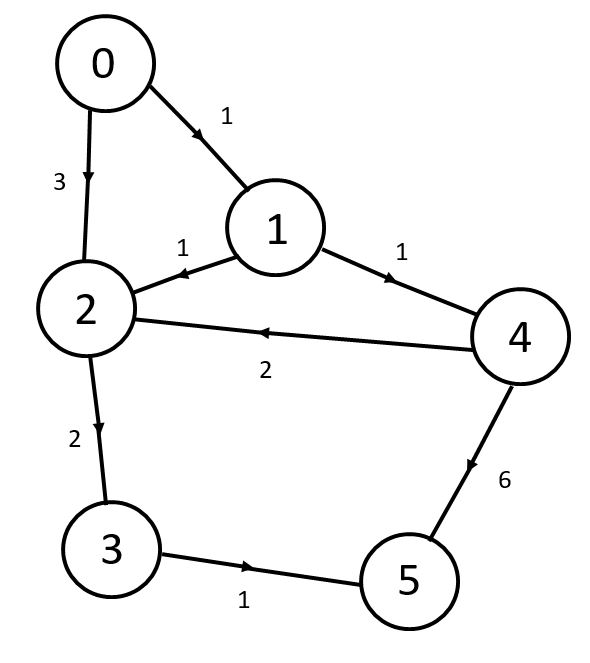

# III : Deux algorithmes d'apprentissage : le TD-Lambda et le Q-Learning

La programmation dynamique est très efficace pour résoudre l'équation de Bellman ... à condition de connaitre les probabilités ! L'objet de cette partie est donc de résoudre le cas où les probabilités ne sont pas connues à l'avance. On va donc utiliser le renforcement, celui-ci étant entre programmation dynamique et métohde de Monte-Carlo.


## a : Le TD-Lambda


Une première solution serait de tester un grand nombre de fois cette boîte noire et d'utiliser le résultat des tests dans le calcul :


Rappel: Méthode de Monte-Carlo, soit $(Y_i)_{i\in \mathbb{N}}$ i.i.d, et loi des grand nombres


$$ \frac{Y_1+Y_2+...+Y_n}{n} \stackrel{p.s}{\longrightarrow} \mathbb{E}(Y_1) $$


en spécifiant
$$Y_i = \sum_{t=0}^{\infty} \gamma^t r(x_t^{(i)},\pi(x_t^{(i)}))$$
où $(x_t^{(i)})$ sont des trajectoires aléatoires où $ x_0^{(i)}= x$.


On a alors, 

$$\frac{Y_1+Y_2+...+Y_n}{n} \stackrel{p.s}{\longrightarrow} V^{\pi}(x)$$

Que l'on peut écrire de manière séquentielle :

$$ V_{k+1}(x)= (1-\eta_{k}) V_{k}(x) + \eta_{k}\sum_{t=0}^{\infty} \gamma^t r(x_t^{(k)},\pi(x_t^{(k)}))$$

où $\eta_{k} = \frac{1}{k}$ ou plus généralement terme générale d'une série $L^1$ divergente et $L^2$ convergente.


Cette suite $((V_{k}(x))$ converge alors vers $V^{\pi}(x)$.


Néanmoins si on code directement la formule ci-dessus le coût en terme de complexité risque d'être assez élevé. En effet, on doit simuler pour chaque $x$  un grand nombre de trajectoires. Cependant en bougeant un petit peu l'écriture on remarque que l'on peut réutiliser des trajectoires pour d'autre états : 

$$V_{k+1}(x_s)= (1-\eta_{k}) V_{k}(x_s) + \eta_{k}\sum_{t=s}^{\infty} \gamma^{t-s} r(x_{t},\pi(x_{t}))$$

on note, $r_t =r(x_{t},\pi(x_{t}))$,


$$V_{k+1}(x_s)= (1-\eta_{k}) V_{k}(x_s) + \eta_{k}\sum_{t=s}^{\infty} \gamma^{t-s} r_t$$

qui devient,

$$V_{k+1}(x_s)=  V_{k}(x_s) + \eta_{k}\sum_{t=s}^{\infty} \gamma^{t-s} (r_t + \gamma V_k(x_{t+1})- V_k(x_{t}))$$

La quantité $\delta_t(V_k) = r_t + \gamma V_k(x_{t+1})- V_k(x_{t})$ est la différence temporelle. On remarque qu'elle ne dépend que de ce qu'il y a en $k$ et d'une nouvelle récompense $r_t$. On peut aussi vérifier que $\mathbb{E}(\delta_t(V_k))=0 $ grâce à l'équation de Bellman.


Donc on a, 
$$V_{k+1}(x_s)=  V_{k}(x_s) + \eta_{k}\sum_{t=s}^{\infty} \gamma^{t-s} \delta_t(V_k)$$

Nous sommes donc heureux, nous avons une équation que nous allons pouvoir exploiter de la même manière que ce que nous avons fait avec l'opérateur de Bellman.

Néanmoins, ici, notre opérateur est aléatoire et la convergence est presque sûre. 

Cependant, nous avons un gros avantage ! 

Nous avons en effet un algorithme qui va pouvoir directement intéragir avec l'environnemnt mais sans en connaitre le fonctionnement à l'avance.


On va coder l'algorithme dit du TD lambda, qui calcule les itération de : 
$$V_{k+1}(x_s)=  V_{k}(x_s) + \eta_{k}\sum_{t=s}^{\infty} (\gamma \lambda)^{t-s} \delta_t(V_k)$$ 

Voici un rapide résumé de l'algorithme suivant, qui marche quand les trajectoires se terminent quasi-sûrement et dans un temps raisonnable : 

On dispose d'un tableau des occurences pour parcourir uniformement tous les états.

1) on prend un état initial, on visite à partir de cet état 


2) si un état est visité on rajoute 1 dans le tableau des occurences 


3) on arrête l'algorithme si chaque état est visité un bon nombre de fois.

On peut passer à la fonction principale, valable dans le cas suivant : 

1) $\gamma = 1$


2) Les trajectoires se terminent en un temps raisonnable


3) $\eta_{k} = \frac{1}{k}$

Enfin, définissons la trace d'éligibilité $z_n \in \mathbb{R^\mathbb{N}} $ qui va nous permetre d'avoir un algorithme itératif.

Une fois la transition $z_n$ à $z_{n+1}$ observée, on peut calculer la différence temporelle $d_k = r^{\pi}(x_k) + V_n(x_{k+1}) -V_n(x_k)$.

On met ensuite la trace d'éligibilité à jour :

$z_{n}(x) = \lambda z_{n-1}(x)$ si x différent de x_k

$z_{n}(x) = 1+\lambda z_{n-1}(x)$ si x différent de x_k

$z_{n}(x) = 0$ si $x_k=0$ (remise à zéro des traces)

Puis on itère (pour tout x) :  $V_{n+1}(x) = V_{n}(x) + \eta_{n}(x) z_{n}(x)d_n $

Quid du choix de $\lambda$ ?

Prendre un $\lambda$ strictement inférieur à 1 permet de réduire la variance des estimateurs, le prendre strictement positif permet de propager plus rapidement les récompenses.

Voila une partie de cette algorithme en python (le reste dans *TDlambda.py*) :

In [6]:
import numpy as np
class TDlambda :
    def delta(self,  r, x, xp ) :
        return r + self.gamma*self.V[xp]-self.V[x]
    
    def learn_episode (self,trajectoire):
        z = np.zeros(self.dim)   # trace d'élligibilité 
        Vp= self.V
        for (r,x,xp) in trajectoire :
            z*= self.ld*self.gamma
            z[x]+=1
            delta = self.delta (r,x,xp)
            Vp +=  (1/self.k_step)*delta*z
            
            
        
        self.k_step +=1
        self.V= Vp

Nous allons tester notre classe sur l'environnement habituel :

In [7]:
from TDlambda import *
p = [1]*n
TD = TDlambda(1,Env,p)
TD.learn(1000)
VI= Value_iterative(T,A,R,1)
VS,ps =VI.V_and_pi_star(0)

print( "Le TD lambda nous retrourne ")
print(TD.V)
print("La vrai valeur (calculé avec VI) est ")
print(VS)

Le TD lambda nous retrourne 
[   0.   -1.   -3.   -6.  -10.  -15.  -21.  -28.  -36.  -45.  -55.  -66.
  -78.  -91. -105. -120. -136. -153. -171. -190.]
La vrai valeur (calculé avec VI) est 
[   0.   -1.   -3.   -6.  -10.  -15.  -21.  -28.  -36.  -45.  -55.  -66.
  -78.  -91. -105. -120. -136. -153. -171. -190.]


Les valeurs sont tré proche pour les premiers états. Cependant, on remarque que ca a tendance à donner des vaeurs etranges sur le bord (les valeurs remontent). Ceci est sans doute du au fait que ces etats sont bien moins frequement utilisé.

## b : Le Q-Learning

On définit tout d'abord le concept de fonction Q-valeur.

La fonction Q-valeur, pour une politique $\pi$, est notée $Q^{\pi}$ : $X \times A \rightarrow \mathbb{R} $ ($X$ et $A$ correspondent aux états et actions) est défini par


$$Q^{\pi}(x,a) = \mathbb{E}[\underset{t \ge 0}{\sum} \gamma^{t} r(x_t,a_t)|x_0=x, a_0=a, a_t=\pi(x_t), t\ge 1]$$

La Q-valeur optimale est alors $Q^{*}(x,a) = \underset{\pi}{max} Q^{\pi}(x,a)$

Construisons une séquence de $Q$-valeurs $Q_n$  (fonctions définies sur l'espace produit $X x A$) de la manière suivante : lors d'une transition d'un état $x$ vers $y$ $\sim$ $p(.|x,a)$ en ayant choisi l'action a, et observé la récompense $r$, on itère la fonction Q-valeur de l'état (x,a) selon : 

$$Q_{n+1}(x,a) = (1 - \eta_{n} (x,a))Q_{n}(x,a) + \eta_{n}(x,a)[r + \underset{b \in A}{max} Q_n(y,b)].$$

Supposons que toutes les politiques sont propres et que tous les états-actions (x,a) sont itérés une une infinité de fois et que les pas satisfont, $\forall (x,a)$,


$$\underset{n \geqslant 0}{\sum} \eta_{n} (x,a) = \infty$$
et $$\underset{n \geqslant 0}{\sum} \eta_{n}^{2} (x,a) < \infty. $$
Alors $\forall x \in X, a \in A$,
$$Q_{n}(x,a) \overset{p.s}{\rightarrow} Q^{*}(x,a).$$


Au lieu de tester une politique déterministe, nous allons suivre des politiques probabilistes : 


- la **politique $\epsilon$-gloutonne** (greedy) qui consiste à prendre l'action avec la plus grande Q-valeur existante avec une probabilité 1-$\epsilon$ et sinon un autre état au hasard avec probabilité $\epsilon$


- la **politique softmax** qui s'inspire de l'**équation de Boltzmann** (en physqiue statistique), de loi :



$$\pi (a|s) = \frac{exp(\beta Q(s,a))}{\underset{a}{\sum} exp(\beta Q(s,a))}$$

Nous avons implémenté l'algorithme qui permet d'apprendre $Q$ suivant ces deux politiques (code complet sur *Q_learning.py*):

In [8]:
class Q_learning : 
    """ Algorithme de Q learning avec une politique epsilon greedy (gloutonne) """
    
    def __init__ (self,env,alpha, epsilon ):
        self.alpha= alpha
        self.env=env
        self.n=env.m_dim
        self.m=env.m_m
        self.occ = [1 for i in range (self.n)]
        self.Q= np.zeros((self.n,self.m+1))
        self.epsilon= epsilon 
    
    def max_action(self,s):
        """donne l'action qui a la plus grande Q-Valeur"""
        ac=0
        v=- np.inf 
        for a in self.env.actions_possibles(s):
            if v< self.Q[s,a]: 
                ac=a
                v= self.Q[s,a]
        return  ac
    
    def epsilon_greedy(self,s):
        """implémente la politique probabiliste greedy"""
        if np.random.rand()< self.epsilon :
            lst= [a for a in self.env.actions_possibles(s)]
            return lst[np.random.randint(len(lst))]
        else :
            return self.max_action(s)
        
        

    def apprendre_action(self,s):
        """actualise les Q-valeurs"""
        a= self.epsilon_greedy(s)
        sp = self.env.etat_suivant (s,a)
        r = self.env.récompense(s,a)
        if not (self.env.est_terminal(sp)):
            self.Q[s,a] +=  self.alpha*(r + max ([self.Q[sp,ap] for ap in self.env.actions_possibles(sp)]) - self.Q[s,a] )
        else :
            self.Q[s,a] +=  self.alpha*(r-self.Q[s,a])
        return sp

            
class Q_learning2 (Q_learning):
    """ hérite de Q_learning avec comme une politique d'exploration softmax (boltzmann)"""
    def softmax(self,s):
        """pour définir boltzmann"""
        lst=[a for a in self.env.actions_possibles(s)]
        exp = np.exp(np.array([self.Q[s,a] for a in lst]))
        S= np.sum(exp)
        exp = exp/S
        alea =np.random.rand()
        u =0
        for i in range (len(lst)):
            u+= exp[i]
            if u> alea :
                return lst[i ]
            
    def apprendre_action(self,s):
        """pour actualiser les Q-valeurs"""
        a= self.softmax(s)
        sp = self.env.etat_suivant (s,a)
        r = self.env.récompense(s,a)
        if not (self.env.est_terminal(sp)):
            self.Q[s,a] +=  self.alpha*(r + max ([self.Q[sp,ap] for ap in self.env.actions_possibles(sp)]) - self.Q[s,a] )
        else :
            self.Q[s,a] +=  self.alpha*(r-self.Q[s,a])
        return sp   

Comme d'habitude, nous avons fait un test unitaire, celui-ci se trouve dans *test_q_learning.py*.

# IV : Une application : Le jeu Pacman

## a : Présentation du jeu

Notre Pacman sera un Pacman simplifié. En effet nous avons décidé de nous limiter à un problème de survie du Pacman. 
Notre personnage ne peut donc pas manger les fantômes mais doit uniquement survivre le plus longtemps possible.


Nous modélisons la carte par une matrice carrée d'ordre $n$ où les $1$ correspondent à des murs et les $0$ à du vide. Les positions du fantôme et du pacman sont representées par des couples de valeurs. 


Voici le constructeur de la classe :

In [9]:
class Mini_Pacman :
    def __init__(self,M,ind,fantome) :
        """ Constructeur de la classe, M est la carte (0 pour du vide et 1 pour un mur),
        ind l'emplacement de debut du pacman et fantome celui du fantome """
        self.M=M                  #La carte 
        self.n=len(M)             # l'ordre de la matrice carrée 
        self.ind_in =ind          # La position initiale du pacman 
        self.fantome_in = fantome #                      du fantome 
        self.ind = ind            # la position courante du pacman  
        self.fantome =fantome     # la position courante du fantome
        self.d_fantome= 1         #La direction du fantome( 1 pour nord)

Nous avons implémenté deux versions de ce jeu simplifié :


   - Dans une première, un fantôme se balade de manière aléatoire (en changeant de direction une fois sur 5). Pacman doit l'éviter le plus longtemps possible
   
   
   - Dans la deuxième, la fantôme est dit à tête chercheuse et utilise la méthode du plus court chemin pour se diriger. 
   
Ces deux versions ont été implémentées sous forme d'objets dans le fichier *mini_pacman.py*. Les méthodes de ces classes sont compatibles avec la classe **Q-learning** codée précédemment. 


   Un problème est survenu durant cette phase d'implémentation. Le format du jeu de pacman (couples de coordonnées du fantôme et de pacman) n'étaient pas compatibles avec notre classe **Q-learning** (prenant ses états sous forme d'entiers). Nous avons donc réalisé une fonction qui permet de convertir une position du fantôme et du pacman en un entier. Il s'agit en réalité d'un **changement de base** :

In [10]:
def conversion(lst,n):
    """Convertit la liste lst en base n en base 10 """
    lst =lst [::-1]
    S= 0
    for c in lst :
        S = n*S +c
    return S

In [11]:
print ("exemple : ", conversion([4,4,4,4],5))

exemple :  624


#### Remarque sur le design du code :
Nous avons encore une fois opté pour la **programmation orientée objet**, d'autant plus qu'ici l'**héritage de classes** nous permet de créer différentes versions du jeu (tête chercheuse, plus ou moins de fantômes ...)


Voici quelques exemples de méthodes (code complet sur *mini_pacman.py*)

In [12]:
class Mini_Pacman :
    def directions_possibles (self,c):
        """ Donne les directions possibles a partir de la case c (coordonnée),
        1 pour nord 2 est 3 sud 4 ouest"""
        n= self.n
        i,j =c 
        res = set() 
        M= self.M
        if j< n- 1 and M[i,j+1]==0 :
            res.add(2)
        
        if i< n- 1 and M[i+1,j]==0 :
            res.add(3)
        
        if 0< j and M[i,j-1]==0 :
            res.add(4)
        
        if 0< i and M[i-1,j]==0 :
            res.add(1)
        return res
    
    def deplacement_ind (self,a): 
        """ Deplace le pacman dans la direction a"""
        i,j =self.ind    
        if a==2 :
            self.ind = i,j+1
        elif a==3 :
            self.ind = i+1,j
        elif a==4 :
            self.ind = i,j-1
        elif a==1 :
            self.ind = i-1,j
    def action_fantome(self):
        """ Le fantome se deplace dans la meme direction en général et ne change de direction qu'une 
        fois sur cinq ou lorsqu'il est contraint de le faire à cause d'un mur"""
        c =self.fantome
        D = self.directions_possibles(c)
        a1= np.random.randint(5)
        if (self.d_fantome in D) and a1 > 0 : # le fantome change rarement
            # de direction sauf si on l'oblige
            self.deplacement_fantome(self.d_fantome)
        else :
            lst= [d for d in D]
            d = lst[np.random.randint(len(lst))]
            self.deplacement_fantome(d)
            self.d_fantome= d

class Mini_Pacman_2 (Mini_Pacman) :
    
    """ Classe qui hérite de Mini_Pacman, mais où le fantome est à tete chercheuse,
    c'est à dire il poursuit le pacman en suivant le chemin le plus court """
        
    def action_fantome(self):
        """ Le fantome est cette fois-ci a tete chercheuse """
        cible =set([self.ind])
        d=0
        while d==0 :
            ciblep= cible.copy()
            for c in ciblep :
                A = self.directions_possibles(c)
                for a in A :
                    cp = self.deplacement(c,a)
                    if cp==self.fantome:
                        a,b =c
                        ap,bp= cp
                        i,j= ap -a, bp-b
                        if i== 1 :
                            d= 1
                        elif i==-1 :
                            d=  3
                        elif j==-1:
                            d=  2
                        else :
                            d=  4
                        break
                    else :
                        cible.add(cp)
                if d!= 0: 
                    break

        self.deplacement_fantome(d)
    
    

Nous avons fait un fichier afin d'itérer l'apprentissage du pacman avec la **méthode Q-learning** et pour afficher le temps de survie du pacman durant l'apprentissage. 


Tout ceci est disponible dans le fichier *entrainement_pacman.py*.


Nous allons maintenant tester le contenu de ces deux fichiers.

## b : Test avec $\epsilon$-greedy

Le premier test est fait avec la **politique $\epsilon$-greedy (gloutonne)** avec la première version du jeu, à savoir un unique fantôme qui se déplace de façon aléatoire.

### i : test avec fantôme naïf

In [13]:
from entrainement_pacman import *

# Etape 1: la map/les positions


M = np.array([  [0,0,0,1,0],       # on def la carte 
                [0,1,0,0,0],
                [0,1,0,1,1],
                [0,1,0,0,0],
                [0,0,0,1,0]])

MP = Mini_Pacman(M, (0,0), (4,0))# pacman version 1 (fantome naif)

print( "Le 5 représente le pacman, le 9 le fantome")
MP.affichage() 

Le 5 représente le pacman, le 9 le fantome
[[5 0 0 1 0]
 [0 1 0 0 0]
 [0 1 0 1 1]
 [0 1 0 0 0]
 [9 0 0 1 0]]


========= SEQUENCE numero  0  ========


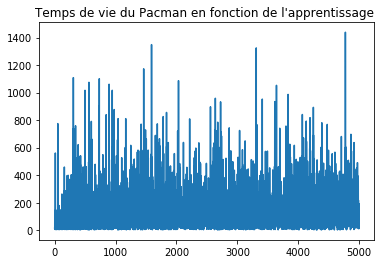

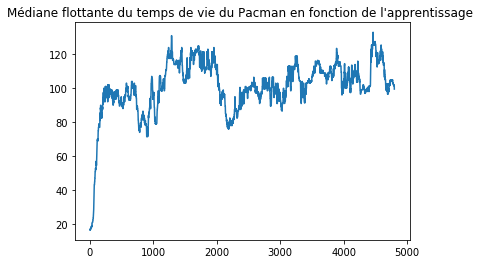

========= SEQUENCE numero  1  ========


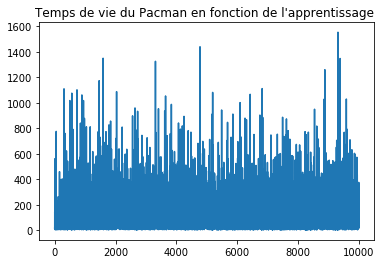

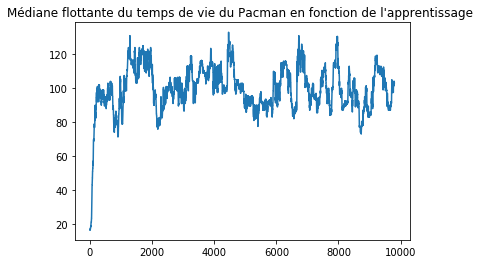

In [16]:
# etape 2 : definition du QL

QL= Q_learning(MP,0.1,0.1) 

# etape 3 : apprentissage (deux sequence de 5000 soit 10 000)
entrainement_sequence(QL,2,5000)

On remarque qu'une forme d'éducation apparait. Cependant le temps de survie stagne autour de 100 déplacements.
On peut donc mieux faire ! 

### ii : Test avec fantôme à tête chercheuse

========= SEQUENCE numero  0  ========


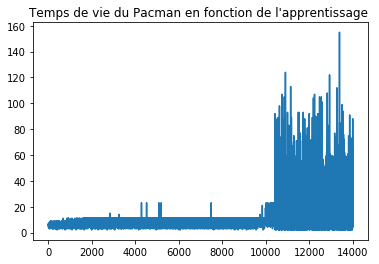

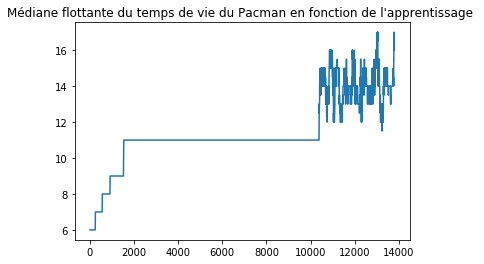

In [24]:
MP2 = Mini_Pacman_2(M, (0,0), (4,0))# pacman version 1 (fantome naif)
QLb = Q_learning(MP2,0.1,0.1) # 0.1 alpha et 0.1 epsilon 
entrainement_sequence(QLb,1,14000)

Dans ce cas, nous remarquons des étapes d'apprentissage (entre 0 et 2000 principalement puis vers 10 000). Cependant, pacman ne comprend pas la stratégie globale à adopter et reste bloqué autour de 14 déplacements de durée de vie avant de mourir, mangé par le fantôme. 

## c : Test avec Softmax (Boltzmann)

### i : Test avec fantôme naïf

Ici, nous réalisons exactement les mêmes tests sauf que nous changeons de politique. Nous utilisons désormais la **politique softmax**. 




========= SEQUENCE numero  0  ========


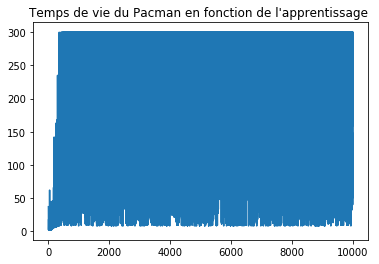

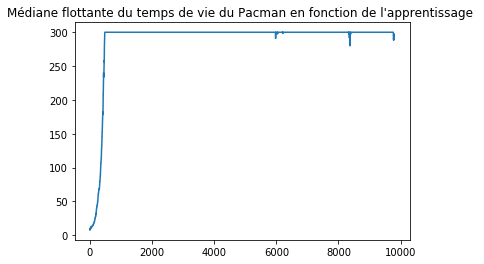

In [26]:


QL2= Q_learning2(MP,0.1,0.1) # version softmax  

entrainement_sequence_kill(QL2,1,10000,300) # ici on kill le pacman au bout de 300 deplacements

**Remarque** : Le résultat d'apprentissage étant bien meilleur qu'avec $\epsilon$-greedy, nous sommes obligés d'arrêter le nombre d'itérations du pacman à 300 déplacements (il meurt de vieillesse). En effet, sans cela, le programme ne s'arrête pas. En effet, les premières fois que nous avons testé la politique softmax, nous ne comprenions pas pourquoi notre programme ne répondait plus. Après réflexion, nous nous sommes aperçus que cette absence de réponse était dûe à un apprentissage efficient. Nous avons donc décidé le faire mourir de vieillesse. 

### ii : Test avec fantôme à tête chercheuse

========= SEQUENCE numero  0  ========


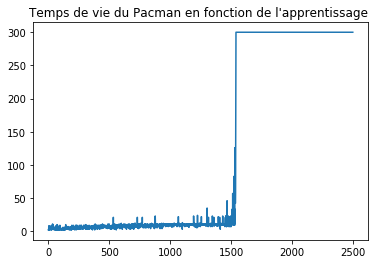

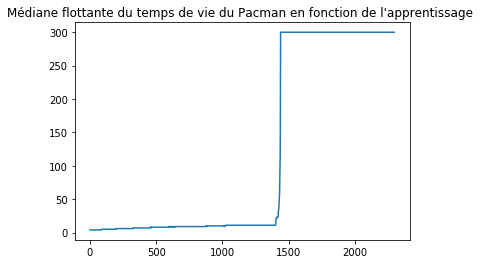

In [22]:
QL2b= Q_learning2(MP2,0.05,0.05) # version softmax  

entrainement_sequence_kill(QL2b,1,2500,300) # ici on kill le pacman au bout de 300 deplacements

Ici, le résultat de l'apprentissage est indiscutable. Pacman obtient son score maximal de survie (à savoir 300, limite qu'on lui a imposée) au bout de seulement 1 500 étapes d'apprentissage. 


**La politique softmax semble donc bien plus pertinente pour ce problème qu'$\epsilon$-greedy**

# Conclusion

## a : Conclusion générale

#### A propos des algorithmes de renforcement 

Pour conclure, les algorithmes de renforcement semblent donner de nombreuses possibilités en terme d'intelligence artificielle. Cependant, l'application réalisée (le pacman), sur laquelle nous avons de bons résultats, n'est que de faible dimension. Celle-ci s'élève au maximum à $5^{4} = 625$ (matrice carrée d'ordre 5 et 2 coordonnées par personnage). Si nous voulions l'appliquer au véritable pacman, comportant 6 fantômes et des grilles bien plus grandes, la dimension exploserait ! (le nombre d'états de notre processus de décision markovien (MDP))Celle-ci aurait de grandes conséquences sur les complexités aussi bien spatiale que temporelle. Exécuter notre code sur nos ordinateurs personnels serait impossible, une bien pkus grande puissance de calcul, disponible par exemple dans des Data Centers, serait nécessaire. Une solution possible à cette difficulté serait de réduire la dimension en incorporant uniquement des informations partielles sur nos personnages (des coordonnées vagues en zones plutôt que par case par exemple).

#### Des difficultés à trouver une application convenable

Trouver une application intéressante avec une dimension assez faible a été une de nos principales difficultés. Nous avons tout d'abord choisi le jeu 2048, puis nous avons été attirés par le blackjack. Celui-ci était cependant trop complexe à implémenter. Nous avons donc porté notre choix tardivement sur ce pacman simplifié, ce choix fut enfin fructueux. 

#### Retour sur la trame de notre projet

Le principal objectif du projet était de se familiariser avec la méthode du Q-learning et avec le Machine Learning dans sa globalité. Le projet semblait très ambitieux, peut-être même trop pour Hélène et Philippe qui avaient peur de se sentir dépassés par le sujet. Néanmoins, Alexis fut une véritable locomotive pour le groupe et son expérience a été plus que profitable à tous les membres du groupe. Il n'a en effet jamais hésité à aider ses deux acolytes, à leur expliquer les notions mathématiques, à répondre aux nombreuses interrogations, etc.
    
Nous étions initialement hésitant sur notre sujet. L'algorithme des fourmis nous paraissait peut-être plus accessible. Random Forest nous semblait tout aussi intéressant que le sujet que nous finalement choisi. Notre choix nous a finalement conduit vers un sujet plus ambitieux et plus compliqué, sans doute guidé par l'envie d'en apprendre plus sur le Machine Learning dans sa globalité, ainsi que par la confiance prodiguée par l'expérience déjà acquise par Alexis. 
    
Ce projet nous a également appris à travailler sur un sujet de programmation en groupe, à partager des fichiers, à documenter le code pour se faire comprendre des autres, à échanger, à partager. 
    
Même si les heures passées dessus furent nombreuses, c'est avec joie que nous nous tournons désormais vers ce travail accompli.

## b : Apports personnels

### i : Apports personnels Alexis Ayme

Ayant déjà programmé auparavant, ce projet m'a permis de découvrir de façon concrète un sujet qui me faisait de l'oeil, d'un point de vue personnel, depuis quelques mois déjà. Je suis très heureux d'avoir appronfondi le RL et de me l'être mieux approprié. J'ai aussi appris à diriger une petite équipe composée de novices, à la fois en les guidant et en leur fournissant des pistes. Alors que j'étais plutôt habitué à travailler seul sur mes projets informatiques, cela m'a beaucoup apporté sur ce domaine.

### ii : Apports personnels Philippe Cantrelle

Novice en programmation, mon expérience se limitait à l'IPT (informatique pour tous) de CPGE. Partir sur le RL me faisait un peu peur mais, rétrospectivement, je suis très heureux d'avoir, avec Hélène et Alexis, pris ce sujet. Cela m'a premièrement permis de démystifer le Machine Learning, me permettant de me rendre compte que, même si le sujet est compliqué, il n'est pas impossible d'en comprendre les mécanismes. J'ai  également appris à utiliser Jupyter et le notebook, à mettre en pratique le concept de classes et à mieux cerner les tests unitaires. 


### iii : Apports personnels Hélène Wang

Bien qu'issue de classes préparatoires MP, je n'avais pas réellement d'expérience en programmation avant de choisir le projet d'informatique, et c'est d'ailleurs pour cela que je l'ai fait. Grâce à ce projet, j'ai pu comprendre les principes sur lesquels le RL se base et mettre en pratique ce que nous avons étudié au premier semestre, notamment les classes. Le projet a de plus fait appel à des notions mathématiques que je n'avais pas rencontrées jusque-là (comme par exemple l'équation de Bellman) et que j'ai donc pu découvrir. C'est aussi la première fois que j'ai utilisé les notebooks ainsi que Github et j'ai pu constaté que ce sont des outils très pratiques pour travailler à plusieurs.